This notebook is for inspecting the distribution of activity predictions for the enumerated amides

In [2]:
import pandas as pd

df = pd.read_csv('../data/predictions/enamine_amides_preds.csv').sort_values(by='mean_prediction', ascending=False)
df

,ID,amine,amide,Random_Forest,Gaussian_Process,std,mean_prediction
0,EN300-67316,C[C@H](N)c1ccccc1,C[C@H](NC(=O)CN1Cc2cc(Cl)ccc2[C@H](C(=O)Nc2cnc...,83.145,96.758,0.654,89.951
2,EN300-67366,C[C@@H](N)c1ccccc1,C[C@@H](NC(=O)CN1Cc2cc(Cl)ccc2[C@H](C(=O)Nc2cn...,83.145,96.758,0.654,89.951
1,EN300-17925,CC(N)c1ccccc1,CC(NC(=O)CN1Cc2cc(Cl)ccc2[C@H](C(=O)Nc2cncc3cc...,83.145,96.758,0.654,89.951
3,EN300-50958,Cl.NCc1cccc(O)c1,O=C(CN1Cc2cc(Cl)ccc2[C@H](C(=O)Nc2cncc3ccccc23...,88.348,87.731,0.758,88.040
4,EN300-146602,Cc1ccc(CCN)cc1,Cc1ccc(CCNC(=O)CN2Cc3cc(Cl)ccc3[C@H](C(=O)Nc3c...,87.187,88.700,0.709,87.943
...,...,...,...,...,...,...,...
58077,EN300-226315,Cc1cc(C)n2c(-c3c(N)cccc3Cl)nnc2n1,Cc1cc(C)n2c(-c3c(Cl)cccc3NC(=O)CN3Cc4cc(Cl)ccc...,21.248,8.574,0.998,14.911
58078,EN300-05401,Nc1nn2cc(-c3ccc(Cl)s3)nc2c2ccccc12,O=C(CN1Cc2cc(Cl)ccc2[C@H](C(=O)Nc2cncc3ccccc23...,21.837,7.861,0.999,14.849
58079,EN300-230311,Cc1cc(C(F)(F)F)nc2sc(C#N)c(N)c12,Cc1cc(C(F)(F)F)nc2sc(C#N)c(NC(=O)CN3Cc4cc(Cl)c...,20.511,8.740,0.998,14.625
58080,EN300-77105,Cc1cc2ncc(S(C)(=O)=O)c(N)n2n1,Cc1cc2ncc(S(C)(=O)=O)c(NC(=O)CN3Cc4cc(Cl)ccc4[...,18.968,10.019,0.998,14.494


Look at the proportion of high-scoring molecules

In [7]:
threshold = 80
print(f'Number of molecules scored with >{threshold}% inhibition by RF: {len(df.query("Random_Forest > @threshold"))} ({len(df.query("Random_Forest > @threshold"))/len(df)*100:.2f}%)')
print(f'Number of molecules scored with >{threshold}% inhibition by GP: {len(df.query("Gaussian_Process > @threshold"))} ({len(df.query("Gaussian_Process > @threshold"))/len(df)*100:.2f}%)')
print(f'Number of molecules scored with >{threshold}% inhibition by both RF & GP: {len(df.query("Random_Forest > @threshold and Gaussian_Process > @threshold"))} ({len(df.query("Random_Forest > @threshold and Gaussian_Process > @threshold"))/len(df)*100:.2f}%)')


Number of molecules scored with >80% inhibition by RF: 10692 (18.41%)
Number of molecules scored with >80% inhibition by GP: 87 (0.15%)
Number of molecules scored with >80% inhibition by both RF & GP: 72 (0.12%)


Inspect some of these molecules

In [5]:
import mols2grid

mols2grid.display(df.query('Random_Forest > @threshold and Gaussian_Process > @threshold').sample(n=8, random_state=42), smiles_col='amide')

MolGridWidget()

Plot the distributions of predicted inhibitions

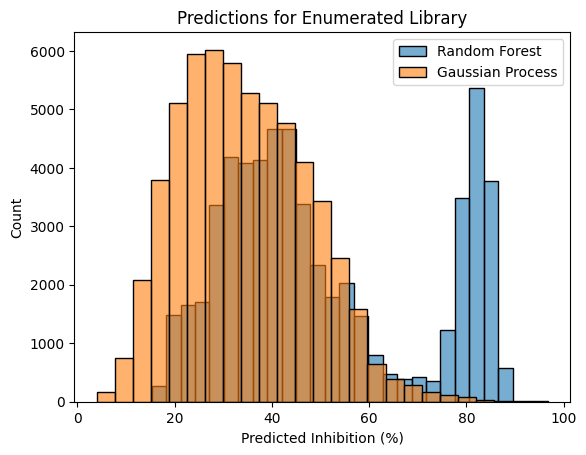

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has the columns 'Random_Forest' and 'Gaussian_Process'

fig = plt.figure()

# Plot the first histogram with a label
sns.histplot(df, x='Random_Forest', label='Random Forest', alpha=0.6, bins=25)

# Plot the second histogram with a label
sns.histplot(df, x='Gaussian_Process', label='Gaussian Process', alpha=0.6, bins=25)

# Display the legend
plt.legend()
plt.xlabel('Predicted Inhibition (%)')
plt.title('Predictions for Enumerated Library')
# Show the plot
plt.show()

Output to an Excel file

In [8]:
df.drop(columns=['ID', 'std']).to_excel('../data/predictions/enumerated_amine_predictions.xlsx', sheet_name='Sheet1', engine='openpyxl', index=False)